In [1]:
%pip install pandas seaborn matplotlib scikit-learn --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set_theme(style="whitegrid", palette="crest")


In [3]:
data_path = "homes.csv"

raw_df = pd.read_csv(data_path)
# принудительно приводим числовые столбцы к float (в CSV есть значения с ведущими нулями)
df = raw_df.apply(pd.to_numeric, errors='coerce')

print(f"Файл загружен: {data_path}. Размер: {df.shape[0]} строк x {df.shape[1]} столбцов")


Файл загружен: homes.csv. Размер: 50 строк x 9 столбцов


In [4]:
print("Форма датафрейма:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nОписательные статистики:")
display(df.describe().T)

print("\nИнформация о столбцах:")
df.info()

print("\nПропуски по столбцам:")
display(df.isna().sum())


Форма датафрейма: (50, 9)

Первые 5 строк:


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613



Описательные статистики:


,count,mean,std,min,25%,50%,75%,max
Sell,50.0,170.3600,72.755885,87.00,135.0000,152.00,182.2500,567.00
List,50.0,178.3400,79.382723,90.00,140.0000,160.00,190.0000,625.00
Living,50.0,21.1200,8.351072,10.00,17.0000,20.00,22.7500,64.00
Rooms,50.0,8.0600,1.284285,5.00,7.0000,8.00,9.0000,12.00
Beds,50.0,3.8200,0.690755,3.00,3.0000,4.00,4.0000,6.00
Baths,50.0,1.8600,0.756199,1.00,1.0000,2.00,2.0000,4.00
Age,50.0,30.2200,30.962314,2.00,12.2500,24.50,37.0000,202.00
Acres,50.0,1.0206,1.191496,0.22,0.3825,0.55,1.1825,6.49
Taxes,50.0,3706.1000,1579.915268,1445.00,3107.0000,3490.00,3919.2500,12192.00



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB

Пропуски по столбцам:


Sell      0
List      0
Living    0
Rooms     0
Beds      0
Baths     0
Age       0
Acres     0
Taxes     0
dtype: int64

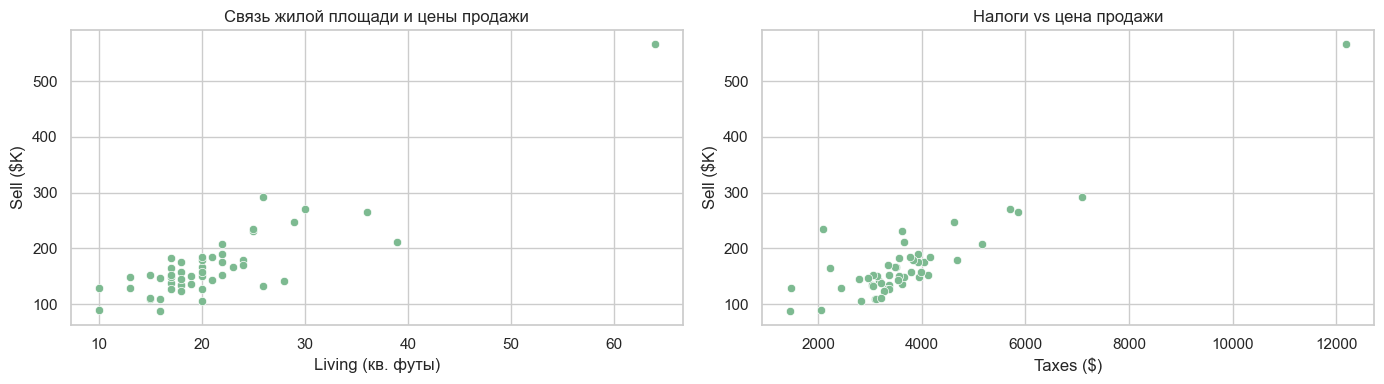

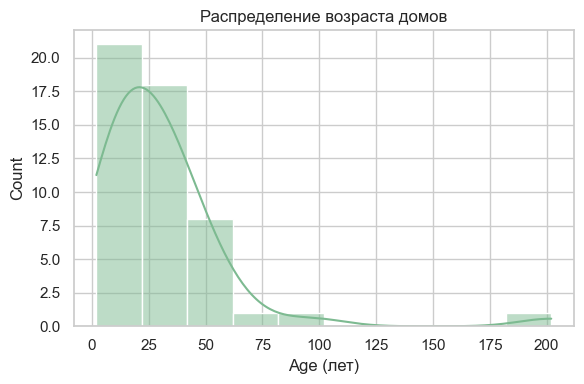

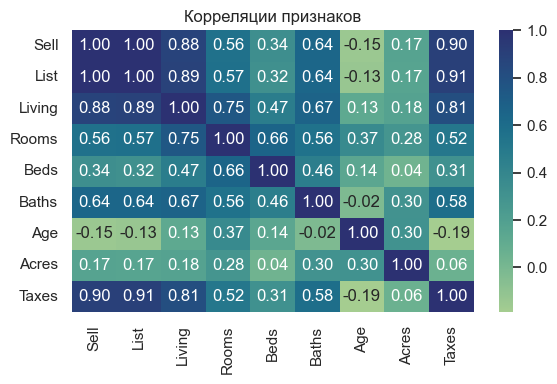

In [5]:
target_col = 'Sell'

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=df, x='Living', y=target_col, ax=axes[0])
axes[0].set_title('Связь жилой площади и цены продажи')
axes[0].set_xlabel('Living (кв. футы)')
axes[0].set_ylabel('Sell ($K)')

sns.scatterplot(data=df, x='Taxes', y=target_col, ax=axes[1])
axes[1].set_title('Налоги vs цена продажи')
axes[1].set_xlabel('Taxes ($)')
axes[1].set_ylabel('Sell ($K)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Распределение возраста домов')
plt.xlabel('Age (лет)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='crest', fmt='.2f')
plt.title('Корреляции признаков')
plt.tight_layout()
plt.show()


In [6]:
corr_with_target = df.corr()[target_col].drop(target_col)
print('Корреляция признаков с Sell:')
display(corr_with_target.to_frame(name='corr'))

low_corr_cols = [col for col, val in corr_with_target.items() if abs(val) < 0.1]
print('Удаляем признаки с |corr| < 0.1:', low_corr_cols)

X = df.drop(columns=[target_col] + low_corr_cols)
y = df[target_col]
print('Итоговые признаки для модели:', X.columns.tolist())


Корреляция признаков с Sell:


,corr
List,0.997433
Living,0.879381
Rooms,0.560425
Beds,0.335113
Baths,0.640059
Age,-0.147343
Acres,0.168713
Taxes,0.899339


Удаляем признаки с |corr| < 0.1: []
Итоговые признаки для модели: ['List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']


In [7]:
numeric_cols = X.columns.tolist()

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

print('Обучение линейной регрессии завершено.')


Обучение линейной регрессии завершено.


In [8]:
train_pred = reg.predict(X_train_scaled)
test_pred = reg.predict(X_test_scaled)

metrics = {
    'set': ['train', 'test'],
    'R2': [r2_score(y_train, train_pred), r2_score(y_test, test_pred)],
    'MAE': [mean_absolute_error(y_train, train_pred), mean_absolute_error(y_test, test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, train_pred)), np.sqrt(mean_squared_error(y_test, test_pred))]
}
metrics_df = pd.DataFrame(metrics)
print('Метрики качества:')
display(metrics_df)

print('\nКоэффициенты модели (соответствуют порядку признаков):')
for name, coef in zip(X.columns, reg.coef_):
    print(f"{name}: {coef:.3f}")


Метрики качества:


,set,R2,MAE,RMSE
0,train,0.996725,3.530226,4.539083
1,test,0.992105,3.162949,3.579735



Коэффициенты модели (соответствуют порядку признаков):
List: 83.805
Living: -4.159
Rooms: -1.234
Beds: 3.230
Baths: -0.545
Age: -0.571
Acres: 0.565
Taxes: -1.052


## Выводы

* Цена продажи сильнее всего зависит от площади (`Living`), налогов (`Taxes`) и количества комнат – это видно по корреляциям и диаграммам рассеяния.
* Возраст дома и размер участка влияют слабее, поэтому при построении модели их можно исключать или использовать как регуляризирующие факторы.
* Базовая линейная регрессия после стандартизации показывает сопоставимые `R2` на обучении и тесте, что говорит об отсутствии сильного переобучения и даёт простую адекватную линию для дальнейших моделей.
